In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv('/content/lab_vehicle.csv')

data.head()
data.info()
data.describe()
print(data.isnull().sum())
n = data.shape[0]
print(f"Number of data points: {n}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   COMPACTNESS                  846 non-null    int64
 1   CIRCULARITY                  846 non-null    int64
 2   'DISTANCE CIRCULARITY'       846 non-null    int64
 3   'RADIUS RATIO'               846 non-null    int64
 4   'PR.AXIS ASPECT RATIO'       846 non-null    int64
 5   'MAX.LENGTH ASPECT RATIO'    846 non-null    int64
 6   'SCATTER RATIO'              846 non-null    int64
 7   ELONGATEDNESS                846 non-null    int64
 8   'PR.AXIS RECTANGULARITY'     846 non-null    int64
 9   'MAX.LENGTH RECTANGULARITY'  846 non-null    int64
 10  'SCALED VARIANCE_MAJOR'      846 non-null    int64
 11  'SCALED VARIANCE_MINOR'      846 non-null    int64
 12  'SCALED RADIUS OF GYRATION'  846 non-null    int64
 13  'SKEWNESS ABOUT_MAJOR'       846 non-null    int64

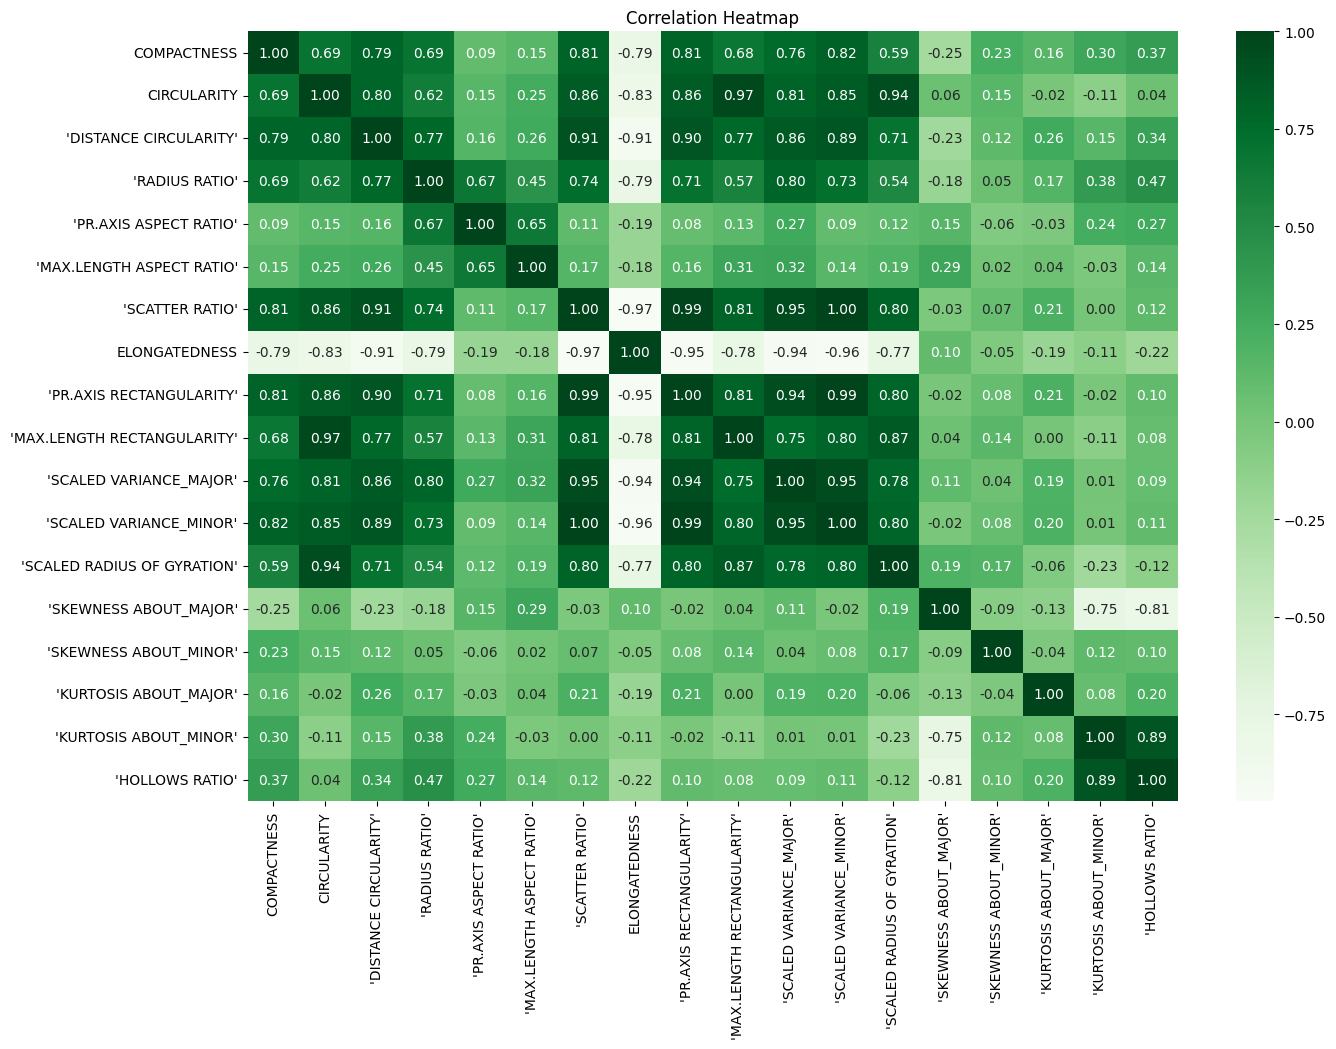

In [10]:
correlation_matrix = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

Calculated k (number of clusters): 12
Converged after 14 iterations.


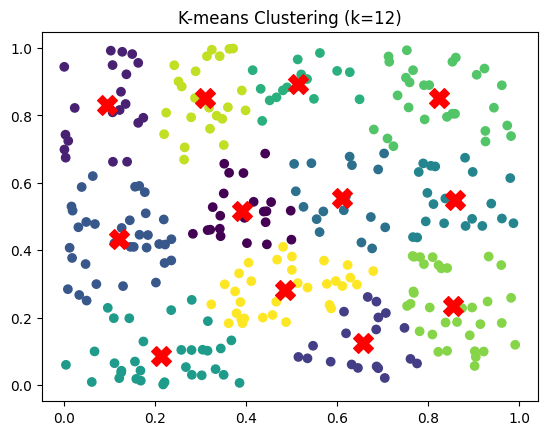

In [14]:
# Function to initialize centroids
def initialize_centroids(X, k):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    return centroids

# Function to compute Euclidean distance
def compute_distance(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return distances

# Function to assign clusters based on the closest centroid
def assign_clusters(X, centroids):
    distances = compute_distance(X, centroids)
    clusters = np.argmin(distances, axis=1)
    return clusters

# Function to update centroids by taking the mean of the data points in each cluster
def update_centroids(X, clusters, k):
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

# K-means Clustering Algorithm
def kmeans(X, max_iters=100, tolerance=1e-4):
    n = X.shape[0]  # Number of data points
    k = int(np.sqrt(n / 2))  # Calculate k using the formula k = sqrt(n / 2)

    print(f"Calculated k (number of clusters): {k}")

    centroids = initialize_centroids(X, k)
    prev_centroids = np.zeros_like(centroids)

    for i in range(max_iters):
        # Step 1: Assign clusters based on the current centroids
        clusters = assign_clusters(X, centroids)

        # Step 2: Update centroids by taking the mean of the points in each cluster
        centroids = update_centroids(X, clusters, k)

        # Check for convergence: if centroids don't change significantly, stop
        if np.all(np.abs(centroids - prev_centroids) < tolerance):
            print(f"Converged after {i+1} iterations.")
            break

        prev_centroids = centroids.copy()

    return centroids, clusters

# Example to run K-means from scratch
if __name__ == "__main__":
    # Generate random data points (example)
    X = np.random.rand(300, 2)  # 300 points in 2D

    # Run K-means clustering
    centroids, clusters = kmeans(X)

    # Visualize the results
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')  # Centroids
    plt.title(f'K-means Clustering (k={len(centroids)})')
    plt.show()


Converged after 6 iterations.
Converged after 6 iterations.
Converged after 7 iterations.
Converged after 6 iterations.
Converged after 14 iterations.
Converged after 12 iterations.
Converged after 17 iterations.
Converged after 13 iterations.
Converged after 16 iterations.


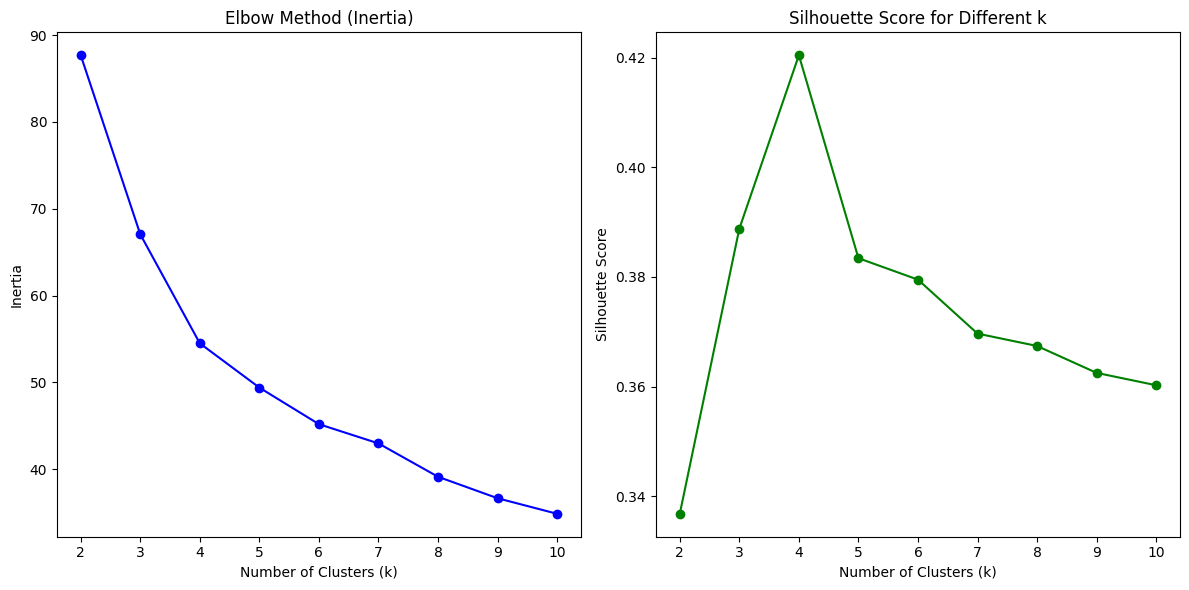

Optimal number of clusters from Elbow method: 2
Optimal number of clusters from Silhouette score: 4
Running K-means with optimal k=4...
Converged after 6 iterations.


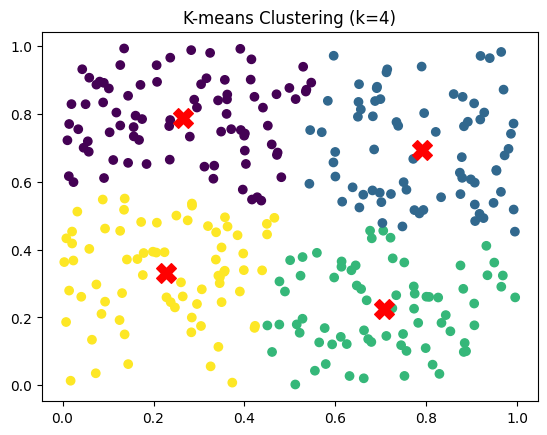

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Function to initialize centroids
def initialize_centroids(X, k):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    return centroids

# Function to compute Euclidean distance
def compute_distance(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return distances

# Function to assign clusters based on the closest centroid
def assign_clusters(X, centroids):
    distances = compute_distance(X, centroids)
    clusters = np.argmin(distances, axis=1)
    return clusters

# Function to update centroids by taking the mean of the data points in each cluster
def update_centroids(X, clusters, k):
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

# K-means Clustering Algorithm (from scratch)
def kmeans(X, k, max_iters=100, tolerance=1e-4):
    centroids = initialize_centroids(X, k)
    prev_centroids = np.zeros_like(centroids)

    for i in range(max_iters):
        # Step 1: Assign clusters based on the current centroids
        clusters = assign_clusters(X, centroids)

        # Step 2: Update centroids by taking the mean of the points in each cluster
        centroids = update_centroids(X, clusters, k)

        # Check for convergence: if centroids don't change significantly, stop
        if np.all(np.abs(centroids - prev_centroids) < tolerance):
            print(f"Converged after {i+1} iterations.")
            break

        prev_centroids = centroids.copy()

    return centroids, clusters

# Function to visualize the Elbow Method and Silhouette Scores
def elbow_method_and_silhouette(X, max_k=10):
    inertia = []
    silhouette_scores = []

    # Calculate inertia and silhouette score for different values of k
    for k in range(2, max_k+1):
        centroids, clusters = kmeans(X, k)  # Using the custom K-means implementation

        # Calculate inertia (sum of squared distances from points to their centroids)
        inertia_value = np.sum(np.min(compute_distance(X, centroids), axis=1))
        inertia.append(inertia_value)

        # Calculate silhouette score
        score = silhouette_score(X, clusters)
        silhouette_scores.append(score)

    # Plot Inertia for the Elbow Method
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_k+1), inertia, marker='o', color='b')
    plt.title('Elbow Method (Inertia)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')

    # Plot Silhouette Scores
    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_k+1), silhouette_scores, marker='o', color='g')
    plt.title('Silhouette Score for Different k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')

    plt.tight_layout()
    plt.show()

    # Return the optimal k based on elbow and silhouette scores
    best_k = np.argmin(np.diff(inertia)) + 2  # Elbow method (k at the point of max inflection)
    print(f"Optimal number of clusters from Elbow method: {best_k}")

    best_silhouette_k = np.argmax(silhouette_scores) + 2  # Silhouette score method
    print(f"Optimal number of clusters from Silhouette score: {best_silhouette_k}")

    return best_k, best_silhouette_k

# Example to run K-means from scratch
if __name__ == "__main__":
    # Generate random data points (example)
    X = np.random.rand(300, 2)  # 300 points in 2D

    # Use Elbow Method and Silhouette Score to determine optimal k
    best_k, best_silhouette_k = elbow_method_and_silhouette(X, max_k=10)

    # Run K-means with the optimal k from the Silhouette Score method
    optimal_k = best_silhouette_k
    print(f"Running K-means with optimal k={optimal_k}...")
    centroids, clusters = kmeans(X, optimal_k)

    # Visualize the final clustering result with centroids
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')  # Centroids
    plt.title(f'K-means Clustering (k={optimal_k})')
    plt.show()
